# Refs
- https://towardsdatascience.com/creating-stakeholder-friendly-dot-plots-e9e9daae9124

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv('data/494724_1224506_compressed_COVID19_open_line_list.csv.zip')
df.rename(columns = {'symptoms': 'symptom'},
          inplace = True)
dfs = df.loc[~df['symptom'].isnull()].copy()
dfs['symptom'] = dfs['symptom'].apply(lambda x: x.replace('feve\\', 'fever').replace('feaver', 'fever'))
df.drop(df.loc[df['symptom'].isnull()].index, inplace=True)

Now create a dictionary that has 4 classes of symptoms 'Fever', 'Cough', 'Fever and Cough', and 'Neither'. The dictionary will have the class names as keys and the count of the number of people who exhibit that symptom as values.



In [3]:
symptom_dict = {}
symptom_dict['Fever'] = len(df.loc[df['symptom'].str.contains('fever') & 
                                   (~df['symptom'].str.contains('cough'))].index)
symptom_dict['Cough'] = len(df.loc[~df['symptom'].str.contains('fever') & 
                                   df['symptom'].str.contains('cough')].index)
symptom_dict['Fever and cough'] = len(df.loc[df['symptom'].str.contains('fever') & 
                                   df['symptom'].str.contains('cough')].index)
symptom_dict['Neither'] = len(df.loc[~df['symptom'].str.contains('fever') & 
                                   ~df['symptom'].str.contains('cough')].index)

In [4]:
symptom_dict


{'Fever': 230, 'Cough': 48, 'Fever and cough': 130, 'Neither': 85}

### plot

The first keyword argument that we need to pass into our dot plot class is the dictionary that contains th einformation of how many people have each class of symptoms. This keyword argument is called data_dict.



In [5]:
data_dict = symptom_dict


The keyword argument class_labels tells the plot what order to plot the classes in starting from the bottom row.



In [6]:
class_labels = ['Fever', 'Fever and cough', 
                'Cough', 'Neither']

In [9]:
cwd = os.getcwd()
os.chdir('src')
from dot_plot_code import create_dot_plot
os.chdir(cwd)

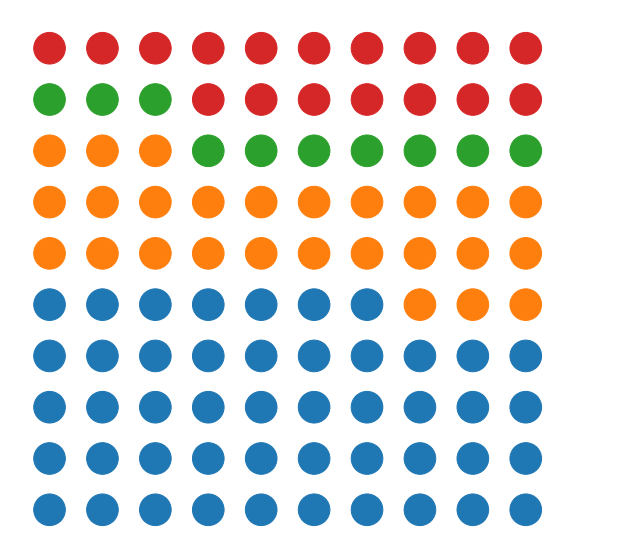

In [10]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=data_dict)

## Define colours for each class

This is an optional keyword argument with defaults applied if it is not provided. The color_dict keyword has the class labels as keys and an associated color to plot.

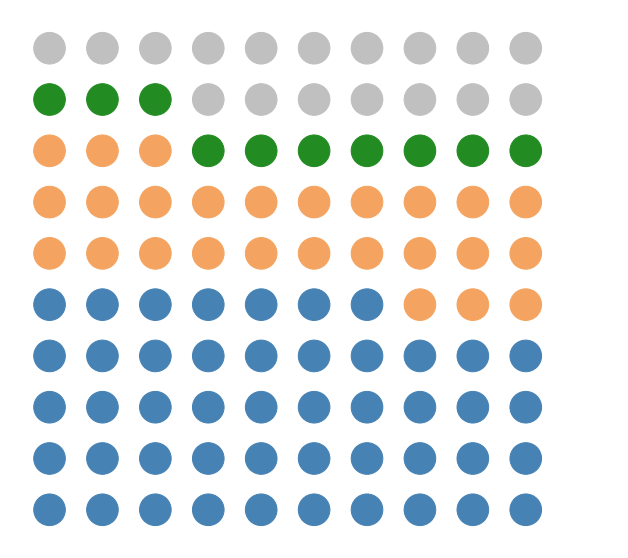

In [11]:
color_dict = {
    'Fever': 'steelblue',
    'Fever and cough': 'sandybrown',
    'Neither': 'silver',
    'Cough': 'forestgreen'}

dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict)

## Change row order
### 'Snake'

The default ordering starts each row from left to right. In some case this isn't appropriate. A class for example that contains just 2 dots might end up with one dot on the right of a line and the other dot on the left of the line above. To me, this is not an ideal arrangement. To deal with this scenario an additional parameter reversed_rows='snake' can be passed into the class. This alternates the order of the dots on each line so that the first line is left to right and the second is right to left etc.

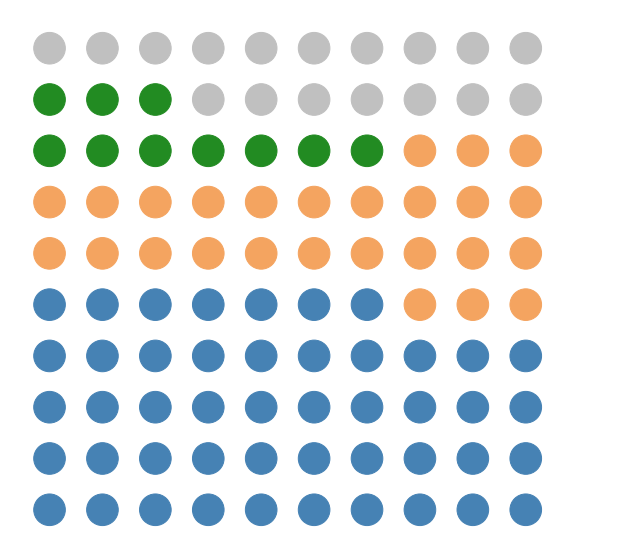

In [12]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict,
    reversed_rows='snake')

## Reverse individual rows
If snaking the rows still isn't appropriate then a list of row numbers can be passed into reversed_rows with the ordering starting at 0 with the bottom row.

For example, if we wanted the order of the dots in the 5th and 9th rows to be reversed we can do the following

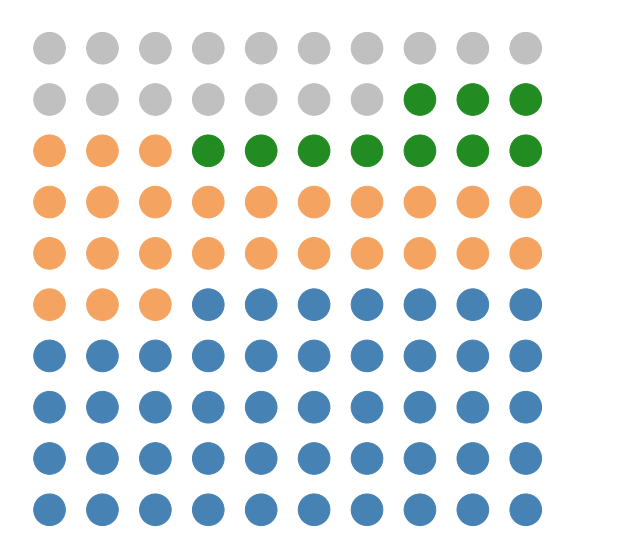

In [13]:
dotplot_figure = create_dot_plot(
    class_labels,
    data_dict,
    color_dict=color_dict,
    reversed_rows=[4, 8])

## Add Labels to the classes
This is where the plot really comes into its own. The class has an option to add labels to each of the classes by passing in ignore_labels=False

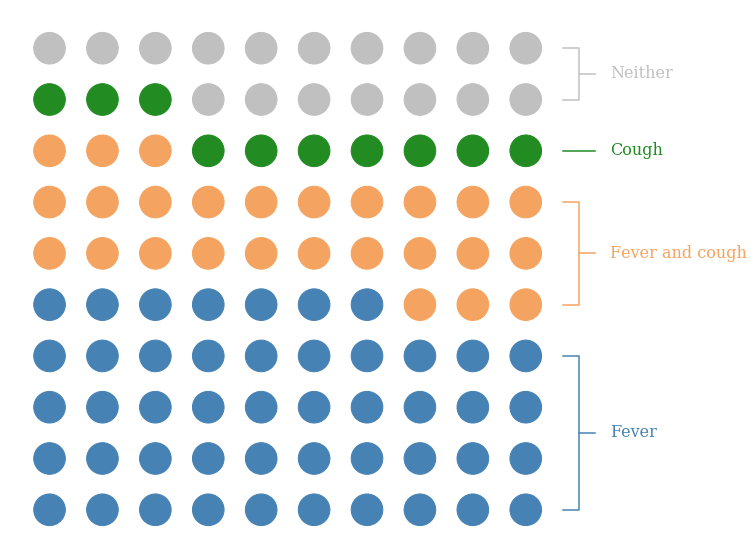

In [14]:
dotplot_figure = create_dot_plot(
    class_labels=class_labels,
    data_dict=symptom_dict,
    color_dict=color_dict,
    ignore_labels=False)

## Add a Title and Caption
The class comes with the option of adding a well placed title and caption.

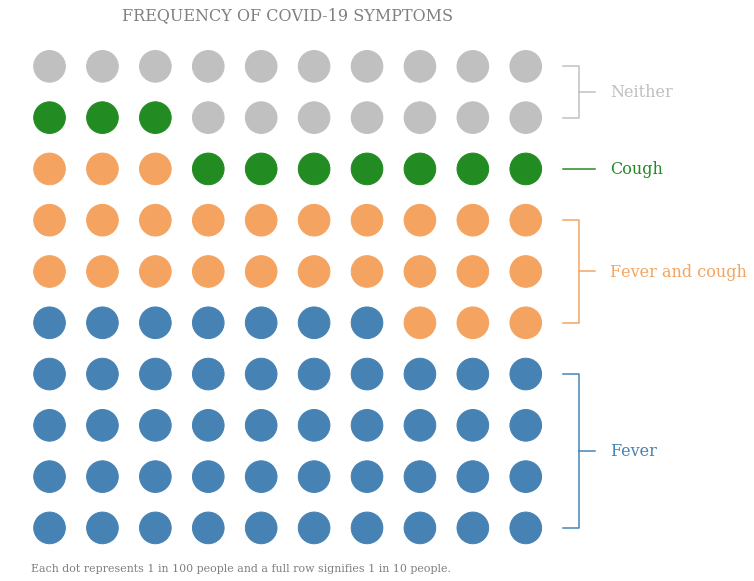

In [15]:
dotplot_figure = create_dot_plot(
    class_labels,
    data_dict,
    color_dict=color_dict,
    ignore_labels=False,
    title='Frequency of covid-19 symptoms',
    caption='Each dot represents 1 in 100 \
people and a full row signifies 1 in 10 people.')

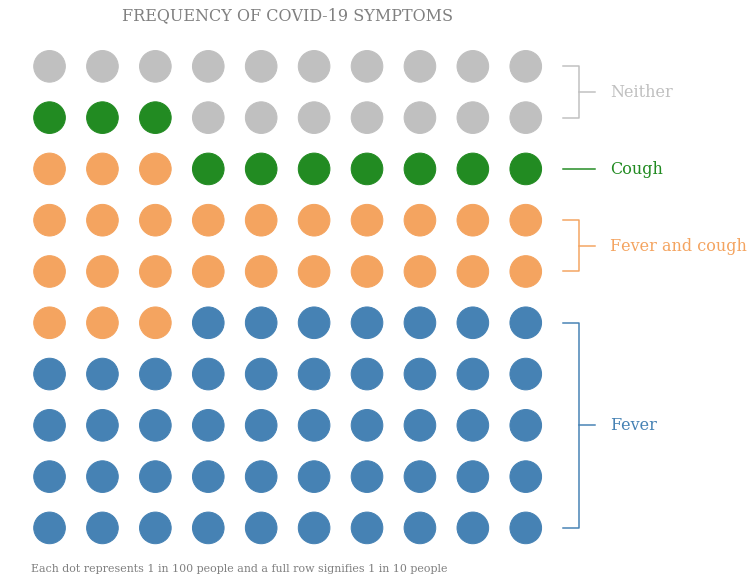

In [16]:
dotplot_figure = create_dot_plot(
    class_labels,
    data_dict,
    color_dict=color_dict,
    reversed_rows=[4],
    ignore_labels=False,
    title='Frequency of covid-19 symptoms',
    caption='Each dot represents 1 in 100 people and a full row signifies 1 in 10 people')
dotplot_figure.f.savefig('figures/title_and_caption.png')

## Saving the file
The create_dot_plot class has 2 attributes create_dot_plot.f and create_dot_plot.ax which are the usual figure and axes handles from matplotlib. You can therefore make any alterations you want my modifying these using standard matplotlib methods. That includes saving the figure which defaults to a high res png image with a transparent background.

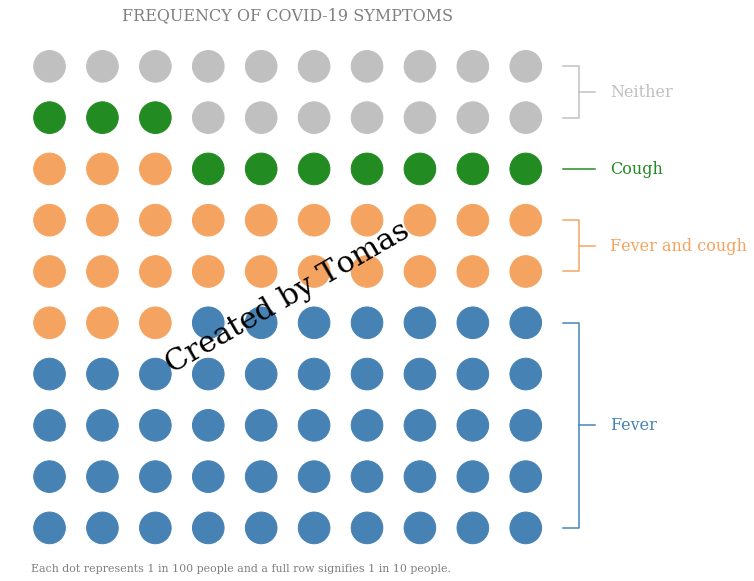

In [17]:
dotplot_figure = create_dot_plot(class_labels,
                    data_dict,
                    color_dict=color_dict,
                    reversed_rows=[4],
                    ignore_labels=False,
                    title='Frequency of covid-19 symptoms',
                    caption='Each dot represents 1 in 100 people and a full row signifies 1 in 10 people.')
dotplot_figure.ax.text(4.5, 4.5, 'Created by Tomas',
                       size=30,
                       color='black',
                       rotation=30,
                       horizontalalignment='center',
                       verticalalignment='center')
dotplot_figure.f.savefig(
    'figures/savefig_example.png')